# Intro from SciKeras

Example to set up a TensorFlow neural network using SciKeras.

from: https://adriangb.com/scikeras/refs/heads/master/notebooks/Basic_Usage.html#3.-Training-a-regressor

# w/ ground_truth_smoothed + TDS_15000

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [8]:
folder_path = '../data/ground_truth_smoothed/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['temperature', 'des_flux'], index_col=None)
            df1.squeeze("columns")
            data[filename] = df1
            
# Combine all the data into a single dataframe
df1 = pd.concat(data.values())

#display(df1)

data = pd.read_csv('../data/des_flux_15000.csv', index_col=0)
data = data.drop(['0'], axis=1)
data.columns = np.arange(303, 1203, 3)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
targets = targets[0:15000]
targets=np.log10(targets)
display(data)
#display(targets)
#targets.describe()

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
display(targets_dten)

targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
display(targets_defc)

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,5.431556e+14,8.071071e+14,1.184429e+15,1.713761e+15,2.445961e+15,3.429175e+15,4.721192e+15,6.375082e+15,8.442567e+15,1.097693e+16,...,5.140261e+08,9.834975e+09,6.844898e+09,-3.696907e+09,-1.254622e+10,-7.215040e+09,7.627497e+09,2.015646e+10,9.745521e+09,-8.880083e+09
1,2.596686e+12,4.076714e+12,6.351138e+12,9.803424e+12,1.500641e+13,2.279380e+13,3.434052e+13,5.130683e+13,7.590502e+13,1.081876e+14,...,1.002663e+10,-1.068198e+10,-6.840741e+09,-4.026817e+06,-8.034967e+08,-4.634127e+08,4.249926e+07,1.600916e+08,3.889720e+08,6.258744e+08
2,3.339683e+09,5.642021e+09,9.415832e+09,1.584884e+10,2.465948e+10,4.365091e+10,6.681661e+10,1.010321e+11,1.616761e+11,2.490812e+11,...,-1.188366e+12,-2.810876e+12,-2.920690e+12,-8.615067e+11,1.530847e+12,2.253783e+12,1.172452e+12,-1.771042e+11,-3.253680e+11,2.113905e+11
3,4.283466e+14,6.382062e+14,9.398283e+14,1.366072e+15,1.960707e+15,2.768870e+15,3.843024e+15,5.236549e+15,7.001591e+15,9.184977e+15,...,-1.875557e+11,1.031065e+12,1.008990e+12,3.197083e+11,-1.727457e+11,-1.657147e+11,5.615346e+10,2.094252e+11,1.182019e+11,-3.624939e+10
4,5.503130e+09,9.322873e+09,1.560241e+10,2.633345e+10,4.105667e+10,7.291645e+10,1.117411e+11,1.673243e+11,2.699026e+11,4.156991e+11,...,4.325521e+11,1.969668e+12,1.547482e+12,3.087470e+11,-3.824844e+11,-2.502393e+11,1.849993e+11,3.979655e+11,2.018650e+11,-6.875192e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.716070e+08,6.477362e+08,1.116053e+09,1.937171e+09,2.998597e+09,5.132705e+09,8.034209e+09,1.292083e+10,2.935564e+10,5.327506e+10,...,1.115373e+12,-6.247980e+10,-1.570836e+11,-1.330799e+11,-1.303191e+11,-1.021088e+11,-7.449359e+10,-4.580231e+10,-6.773719e+09,-5.132272e+10
14996,1.648427e+11,2.678562e+11,4.291465e+11,6.896662e+11,1.096886e+12,1.640556e+12,2.468452e+12,3.832283e+12,6.040403e+12,9.362120e+12,...,6.053191e+12,1.156134e+12,-6.968984e+11,-1.321681e+12,-9.812151e+11,-7.408279e+11,-4.912488e+11,-3.512765e+11,-2.522848e+11,-5.532803e+10
14997,3.258232e+15,4.518116e+15,6.134973e+15,8.158378e+15,1.063716e+16,1.362517e+16,1.717411e+16,2.135776e+16,2.624071e+16,3.189453e+16,...,6.938606e+12,3.134205e+12,3.128328e+11,-1.104769e+12,-1.689070e+12,-1.041729e+12,-7.312501e+11,-4.404335e+11,-2.053144e+11,-1.195245e+11
14998,1.587418e+14,2.393419e+14,3.573717e+14,5.281862e+14,7.721274e+14,1.115258e+15,1.589609e+15,2.232418e+15,3.084444e+15,4.187508e+15,...,-2.273954e+10,1.148413e+11,1.236938e+11,6.334739e+10,1.194185e+10,-3.746565e+09,-6.765696e+09,-1.137732e+10,-8.330577e+09,1.285371e+08


,detrap_en1,detrap_en2,detrap_en3,detrap_en4
0,0.031443,0.037665,0.107516,0.134757
1,0.080354,0.159082,0.193694,0.264261
2,0.137289,0.181180,0.196881,0.202345
3,0.034420,0.092826,0.171222,0.269840
4,0.139829,0.197703,0.201590,0.248880
...,...,...,...,...
14995,0.162075,0.202134,0.202349,0.289266
14996,0.110007,0.136865,0.216518,0.292430
14997,0.005659,0.220189,0.292129,0.298811
14998,0.042493,0.138169,0.169589,0.172986


,def_conc1,def_conc2,def_conc3,def_conc4
0,-1.918837,-1.892938,-2.675767,-1.602267
1,-2.030555,-1.901392,-2.996865,-2.151971
2,-2.020689,-1.823427,-2.863789,-1.661659
3,-1.698449,-2.672288,-1.715194,-1.968193
4,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...
14995,-1.627500,-2.284764,-2.750393,-1.738754
14996,-1.679145,-2.161642,-1.894236,-1.772730
14997,-1.960464,-1.616451,-1.856256,-2.727496
14998,-1.863082,-2.362898,-3.007523,-1.727098


In [11]:
gt_smooth=df1['des_flux']
gt_smooth=gt_smooth.tolist()
num_files=int(len(gt_smooth)/902)
gt_smooth=np.reshape(gt_smooth, [num_files, 902])
gt_smooth = pd.DataFrame(gt_smooth)
gt_smooth = gt_smooth.iloc[:,::3].drop([0], axis=1)
gt_smooth.columns = np.arange(303, 1203, 3)
display(gt_smooth)

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,-1.189556e+13,-1.189556e+13,-1.601972e+13,-6.764586e+12,1.465824e+13,1.756642e+13,3.357349e+13,6.694878e+13,8.583175e+13,1.307798e+14,...,8.781599e+14,8.886085e+14,9.172637e+14,9.539456e+14,9.703699e+14,9.546444e+14,9.509347e+14,9.237300e+14,9.237300e+14,9.237300e+14
1,-1.242209e+13,-1.242209e+13,-1.160671e+13,-7.752681e+12,-1.709553e+12,-1.709553e+12,-3.193780e+12,-4.852353e+12,-1.084451e+13,-1.108761e+13,...,6.892849e+14,7.050914e+14,6.584873e+14,6.751751e+14,6.695220e+14,6.444787e+14,6.504005e+14,6.694371e+14,6.694371e+14,6.694371e+14
2,-3.056371e+12,-3.056371e+12,-3.056371e+12,-4.488124e+12,-4.488124e+12,-4.488124e+12,-4.790591e+12,-4.790591e+12,-4.790591e+12,-3.792556e+12,...,1.047999e+15,1.016736e+15,1.000431e+15,9.445331e+14,9.144904e+14,9.093861e+14,9.453542e+14,9.349422e+14,9.349422e+14,9.349422e+14
3,-5.630330e+12,-5.630330e+12,-5.630330e+12,-3.013159e+12,1.670978e+12,5.021667e+12,2.626789e+12,1.931717e+12,5.891271e+12,3.561159e+12,...,8.824831e+14,8.362190e+14,8.417632e+14,8.404725e+14,7.927108e+14,7.698884e+14,7.772837e+14,7.615103e+14,7.615103e+14,7.615103e+14
4,-3.441240e+12,-3.441240e+12,-5.115264e+12,-5.952275e+12,-5.966832e+12,-4.827420e+12,-5.466685e+12,-1.836251e+12,2.092247e+12,1.390735e+12,...,6.566746e+14,6.138524e+14,6.263330e+14,6.309943e+14,6.320706e+14,6.589949e+14,6.766455e+14,6.674962e+14,6.674962e+14,6.674962e+14
5,8.366467e+11,8.366467e+11,-8.373580e+11,-1.674361e+12,-4.185387e+12,-6.213632e+12,-4.065212e+12,-3.024283e+12,1.056062e+12,1.056062e+12,...,4.567005e+14,4.684412e+14,5.173519e+14,5.139929e+14,5.208772e+14,5.252722e+14,5.185077e+14,4.914499e+14,4.914499e+14,4.914499e+14
6,-1.350588e+14,-1.350588e+14,-1.324877e+14,-1.153871e+14,-1.096298e+14,-9.234390e+13,-7.636607e+13,-6.948777e+13,-6.785269e+13,-3.447872e+13,...,1.349333e+15,1.380000e+15,1.408667e+15,1.471333e+15,1.492667e+15,1.424667e+15,1.350000e+15,1.348667e+15,1.348667e+15,1.348667e+15
7,1.454906e+12,1.454906e+12,1.146146e+12,5.345952e+11,1.160219e+11,-2.705816e+12,-2.584151e+12,-2.837237e+12,-3.899729e+12,-5.992256e+12,...,8.274555e+14,8.431785e+14,8.719091e+14,8.678606e+14,8.927203e+14,8.792649e+14,8.387015e+14,8.032241e+14,8.032241e+14,8.032241e+14
8,4.497788e+12,4.497788e+12,4.497788e+12,1.854954e+12,3.504646e+12,-1.255354e+12,-4.888567e+12,-4.888567e+12,-5.263233e+12,-6.912926e+12,...,7.590507e+14,7.576300e+14,7.531184e+14,8.049415e+14,8.374485e+14,8.298971e+14,8.380026e+14,8.227731e+14,8.227731e+14,8.227731e+14
9,-1.191255e+12,-1.191255e+12,-1.711268e+12,-1.578087e+11,-3.818182e+12,-5.607553e+12,-5.712926e+12,-2.588758e+12,-6.791484e+12,-2.529036e+12,...,1.686667e+15,1.680000e+15,1.576667e+15,1.535333e+15,1.528000e+15,1.497333e+15,1.478667e+15,1.487333e+15,1.487333e+15,1.487333e+15


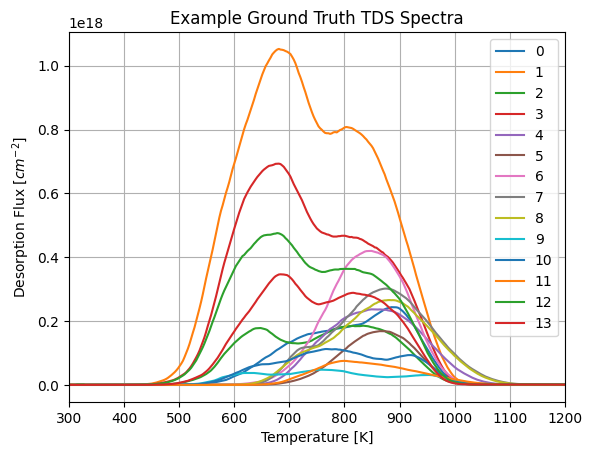

In [ ]:
import matplotlib.pyplot as plt
for i in np.arange(0,14):
    plt.plot(gt_smooth.iloc[i], label=str(i))
#plt.plot(ground_truth.iloc[10], label=str(10))
plt.title("Example Ground Truth TDS Spectra")
plt.xlabel("Temperature [K]")
plt.ylabel("Desorption Flux [$cm^{-2}$]")
plt.xticks(np.arange(0,1300,100))
plt.xlim([300,1200])
plt.grid()
plt.legend()
plt.show()

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)
#y_train_defc, y_test_defc = train_test_split(targets_defc, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.06308629 -5.69987483 -0.06168572 -0.0656779  -0.0628754 ]
Mean cross-validation score: -1.1906400288709569
Test set score : 0.4311038410645507


In [13]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,...,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-1.657933e-17,-7.223851e-17,3.079019e-17,5.921189e-17,5.684342e-17,-1.480297e-17,-4.618528e-17,5.921189e-17,1.184238e-17,5.802766e-17,...,-4.736952e-18,1.421085e-17,-7.105427e-18,-4.736952e-18,1.421085e-17,1.184238e-17,2.368476e-18,-9.473903e-18,-7.105427e-18,-4.736952e-18
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,...,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-4.190286e-01,-4.324523e-01,-4.464790e-01,-4.608412e-01,-4.753213e-01,-4.897180e-01,-5.038971e-01,-5.177429e-01,-5.313024e-01,-5.444639e-01,...,-9.910440e-02,-9.338746e-02,-8.768775e-02,-8.235440e-02,-7.787155e-02,-7.423208e-02,-6.968016e-02,-7.013604e-02,-6.498335e-02,-2.123192e-01
25%,-4.189894e-01,-4.324040e-01,-4.464200e-01,-4.607691e-01,-4.752329e-01,-4.896090e-01,-5.037597e-01,-5.175711e-01,-5.310911e-01,-5.442008e-01,...,-9.822869e-02,-9.208197e-02,-8.627410e-02,-8.079323e-02,-7.563533e-02,-7.079920e-02,-6.625484e-02,-6.199890e-02,-5.800650e-02,-5.430663e-02
50%,-4.122992e-01,-4.246215e-01,-4.373262e-01,-4.501023e-01,-4.625909e-01,-4.746528e-01,-4.863093e-01,-4.970061e-01,-5.063553e-01,-5.146327e-01,...,-9.822500e-02,-9.207740e-02,-8.626752e-02,-8.078505e-02,-7.562488e-02,-7.078471e-02,-6.623742e-02,-6.196854e-02,-5.796441e-02,-5.425939e-02
75%,-1.783032e-01,-1.645721e-01,-1.468558e-01,-1.238437e-01,-9.556518e-02,-6.605619e-02,-3.380321e-02,4.544364e-03,4.054311e-02,7.522206e-02,...,-9.819057e-02,-9.203983e-02,-8.622957e-02,-8.074109e-02,-7.557817e-02,-7.072288e-02,-6.616144e-02,-6.188043e-02,-5.786160e-02,-5.414272e-02
max,6.720082e+00,6.303987e+00,5.954355e+00,5.670963e+00,5.498405e+00,5.349773e+00,5.222346e+00,5.112146e+00,5.016885e+00,4.932767e+00,...,3.457779e+01,3.602366e+01,3.746155e+01,3.888102e+01,4.027138e+01,4.162268e+01,4.292451e+01,4.416810e+01,4.534697e+01,4.645330e+01


In [17]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(-4, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

Optimal alpha: 0.05336699231206313


In [ ]:
# #Measures alpha, to be used as activity_regularizer=l2(alpha)

# from sklearn import linear_model
# from sklearn.model_selection import cross_validate, KFold
# import matplotlib.pyplot as plt

# features = [c for c in X_train_transform.columns]
# cv_results = []
# coeffs = []
# alphas = np.logspace(-4, 0, 100)
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# for alpha in alphas: #set up an array for alpha
#     lasso = linear_model.Lasso(alpha=alpha, max_iter=10000) #iterate through alpha values
# #    lasso.fit(X_train_transform, y_train)#fit the norm_train_X and our target data column (form_y)
#     lasso.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)    
# #    lasso.fit(X_train_transform, y_train_dten)#fit the norm_train_X and our target data column (form_y)
# #    scores = cross_validate(lasso, X_train_transform, y_train, cv=kfold, scoring="neg_mean_squared_error")
#     scores = cross_validate(lasso, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
# #    scores = cross_validate(lasso, X_train_transform, y_train_dten, cv=kfold, scoring="neg_mean_squared_error")
#     cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

# cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:4])
# f, ax = plt.subplots(figsize=(6, 6))
# plt.plot(cv_results["alpha"], cv_results["score"], "-x")
# #plt.xlim(0,10000)
# plt.xscale(r"log")
# #plt.xlim([0.1, 10])
# #plt.xlim([0.01])
# plt.xlabel(r"$\alpha$")
# plt.ylabel(r"MSE")
# plt.title(r"Lasso regression")
# lasso_bestalpha = cv_results["alpha"][cv_results["score"].idxmin()]
# plt.annotate(
#     r"Best $\alpha$ = %.7f" % lasso_bestalpha,
#     (lasso_bestalpha, cv_results["score"].min()),
#     fontsize=16,
# );

In [ ]:
# #Measures alpha, to be used ass activity_regularizer=l2(alpha)

# from sklearn import linear_model
# from sklearn.model_selection import cross_validate, KFold
# import matplotlib.pyplot as plt

# features = [c for c in X_train_transform.columns]
# cv_results = []
# coeffs = []
# alphas = np.logspace(-2, 0, 100)
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# for alpha in alphas: #set up an array for alpha
#     ridge = linear_model.Ridge(alpha=alpha, max_iter=10000) #iterate through alpha values
#     ridge.fit(X_train_transform, y_train)#fit the norm_train_X and our target data column (form_y)
#     #ridge.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)
#     #ridge.fit(X_train_transform, y_train_dten)#fit the norm_train_X and our target data column (form_y)
#     scores = cross_validate(ridge, X_train_transform, y_train, cv=kfold, scoring="neg_mean_squared_error")
#     #scores = cross_validate(ridge, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
#     #scores = cross_validate(ridge, X_train_transform, y_train_dten, cv=kfold, scoring="neg_mean_squared_error")
#     cv_results.append([alpha, -np.mean(scores["test_score"])] + list(ridge.coef_))

# cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:8])
# f, ax = plt.subplots(figsize=(6, 6))
# plt.plot(cv_results["alpha"], cv_results["score"], "-x")
# #plt.xlim(0,10000)
# plt.xscale(r"log")
# #plt.xlim([0.1, 10])
# #plt.xlim([0.01])
# plt.xlabel(r"$\alpha$")
# plt.ylabel(r"MSE")
# plt.title(r"Ridge regression")
# ridge_bestalpha = cv_results["alpha"][cv_results["score"].idxmin()]
# plt.annotate(
#     r"Best $\alpha$ = %.6f" % ridge_bestalpha,
#     (ridge_bestalpha, cv_results["score"].min()),
#     fontsize=16,
# );

In [26]:
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='linear'))
    model.summary()
    return model

In [27]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [31]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1092,64))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:
#layer_activation = 

#define output layer activation:


[[(32,), (96,), (160,), (224,), (288,), (352,), (416,), (480,), (544,), (608,), (672,), (736,), (800,), (864,), (928,), (992,), (1056,)], [(32, 32), (32, 96), (32, 160), (32, 224), (32, 288), (32, 352), (32, 416), (32, 480), (32, 544), (32, 608), (32, 672), (32, 736), (32, 800), (32, 864), (32, 928), (32, 992), (32, 1056), (96, 96), (96, 160), (96, 224), (96, 288), (96, 352), (96, 416), (96, 480), (96, 544), (96, 608), (96, 672), (96, 736), (96, 800), (96, 864), (96, 928), (96, 992), (96, 1056), (160, 160), (160, 224), (160, 288), (160, 352), (160, 416), (160, 480), (160, 544), (160, 608), (160, 672), (160, 736), (160, 800), (160, 864), (160, 928), (160, 992), (160, 1056), (224, 224), (224, 288), (224, 352), (224, 416), (224, 480), (224, 544), (224, 608), (224, 672), (224, 736), (224, 800), (224, 864), (224, 928), (224, 992), (224, 1056), (288, 288), (288, 352), (288, 416), (288, 480), (288, 544), (288, 608), (288, 672), (288, 736), (288, 800), (288, 864), (288, 928), (288, 992), (288,

In [27]:
#1 layer GridSearch gave (512,)
#For loop to make list of tuples
#(512, i)

# _2dim_layers=[]
# first_layer = 512
# for i in neurons:
#     temp_arch = (first_layer, i)
#     _2dim_layers.append(temp_arch)
# print(_2dim_layers)

[(512, 1), (512, 2), (512, 3), (512, 4), (512, 5), (512, 6), (512, 7), (512, 8), (512, 9), (512, 10), (512, 11), (512, 12), (512, 13), (512, 14), (512, 15), (512, 16), (512, 17), (512, 18), (512, 19)]


In [32]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':lr_list,
    'model__hidden_layer_sizes':neurons_list[0],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

Fitting 3 folds for each of 425 candidates, totalling 1275 fits
-0.08632667851475324 {'model__dropout': 0.30000000000000004, 'model__hidden_layer_sizes': (32,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.1}
CPU times: total: 15.6 s
Wall time: 28min 41s


In [ ]:
# Fitting 3 folds for each of 425 candidates, totalling 1275 fits
# -0.08632667851475324 {'model__dropout': 0.30000000000000004, 'model__hidden_layer_sizes': (32,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.1}
# CPU times: total: 15.6 s
# Wall time: 28min 41s

In [28]:
#Once the param_grid is created, can call function again
#or 
from scikeras.wrappers import KerasRegressor

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32,),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [29]:
import tensorflow as tf
from tensorflow import keras

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               38528     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                

In [31]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(y_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,-4.011439e+14,2.531183e+14,7.673681e+14,-7.430444e+14,-1.061877e+16,-8.029609e+15,-7.377021e+15,-7.957940e+15
1,-3.761584e+15,-4.609030e+15,-5.029071e+15,-3.037657e+15,-2.765801e+16,-3.005712e+16,-2.392871e+16,-2.567841e+16
2,5.443838e+14,5.464324e+14,4.030784e+13,-1.772306e+14,-6.817770e+15,-6.556065e+15,-5.072869e+15,-6.673590e+15
3,-3.380148e+15,-2.701280e+14,-5.411637e+14,-5.765610e+14,-2.543383e+16,-2.171206e+16,-1.662436e+16,-1.727162e+16
4,-8.146418e+14,-2.592525e+14,-7.864635e+13,-1.954439e+14,-3.005828e+15,-2.428503e+15,-1.890702e+15,-2.726227e+15
5,-2.497914e+14,-1.902926e+14,-1.384916e+14,-7.677717e+14,-2.536827e+15,-3.431404e+15,-3.278361e+15,-3.375598e+15
6,-1.370913e+15,-7.749677e+14,1.243882e+14,-9.537145e+14,-6.984852e+15,-5.271326e+15,-4.112737e+15,-5.198650e+15
7,-8.594279e+14,4.229811e+14,-9.030324e+14,-1.634323e+15,-5.078081e+15,-7.576110e+15,-8.219743e+15,-7.972861e+15
8,-9.504094e+14,-2.619468e+14,-9.289307e+14,-1.608334e+15,-3.510658e+15,-3.972398e+15,-4.591077e+15,-4.445898e+15
9,-2.670324e+14,-7.469255e+13,-2.392035e+14,-1.122499e+14,-1.943751e+15,-1.595420e+15,-7.325987e+14,-1.335611e+15


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,-1.036623e+15,-3.843883e+14,-4.593411e+14,-8.028794e+14,-9.352957e+15,-8.914036e+15,-7.292793e+15,-7.810018e+15
std,1.330491e+15,1.282619e+15,1.392714e+15,8.391357e+14,8.921467e+15,8.544238e+15,6.614596e+15,6.890570e+15
min,-3.761584e+15,-4.609030e+15,-5.029071e+15,-3.037657e+15,-2.765801e+16,-3.005712e+16,-2.392871e+16,-2.567841e+16
25%,-1.265787e+15,-2.680827e+14,-4.656737e+14,-9.436610e+14,-1.145466e+16,-1.042491e+16,-1.001795e+16,-8.474217e+15
50%,-8.266673e+14,-2.195708e+14,-9.732190e+13,-6.598027e+14,-5.947925e+15,-5.913696e+15,-4.831973e+15,-5.936120e+15
75%,-2.541016e+14,2.709655e+14,1.033681e+14,-2.345719e+14,-3.132035e+15,-3.566652e+15,-3.032202e+15,-3.382192e+15
max,5.661162e+14,5.464324e+14,7.673681e+14,2.728732e+14,-1.143197e+15,-1.116427e+15,-7.325987e+14,-9.681776e+14


In [ ]:
targets.describe()

# TDS_15000 + pRamp05

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [2]:
folder_path = '../data/ground_truth_smoothed/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['temperature', 'des_flux'], index_col=None)
            df1.squeeze("columns")
            data[filename] = df1
            
# Combine all the data into a single dataframe
#df1 = pd.concat(data.values())

display(df1)

folder_path = '../data/TDS_15000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df2 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)

            data[filename] = df2
            
# Combine all the data into a single dataframe
df2 = pd.concat(data.values())

#display(df2)

#Load and preprocess the data
folder_path = '../data/TDS_pRamp05_tmax_3000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df3 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)
            df3.squeeze("columns")
            data[filename] = df3
            
# Combine all the data into a single dataframe
df3 = pd.concat(data.values())

#display(df3)

# data = pd.read_csv('../data/des_flux_15000.csv', index_col=0)
# data = data.drop(['0'], axis=1)
# data.columns = np.arange(303, 1203, 3)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
# targets = targets[0:15000]
targets=np.log10(targets)
#display(data)
#display(targets)
#targets.describe()

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
# display(targets_dten)
# display(targets_defc)

,temperature,des_flux
0,0.0,1.000000e+00
1,300.0,-3.832032e+12
2,301.0,-3.832032e+12
3,302.0,-3.832032e+12
4,303.0,-3.832032e+12
...,...,...
897,1196.0,7.706581e+14
898,1197.0,7.706581e+14
899,1198.0,7.706581e+14
900,1199.0,7.706581e+14


In [3]:
TDS_combined_raw = pd.concat([df2, df3])
TDS_combined_raw=TDS_combined_raw['des_flux']
TDS_combined_raw=TDS_combined_raw.tolist()
num_files=int(len(TDS_combined_raw)/301)
TDS_combined_raw=np.reshape(TDS_combined_raw, [num_files, 301])
TDS_combined_raw=pd.DataFrame(TDS_combined_raw)
TDS_combined_raw = TDS_combined_raw.drop([0], axis=1)
TDS_combined_raw.columns =np.arange(303, 1203, 3)
display(TDS_combined_raw)

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,5.431556e+14,8.071071e+14,1.184429e+15,1.713761e+15,2.445961e+15,3.429175e+15,4.721192e+15,6.375082e+15,8.442567e+15,1.097693e+16,...,5.140261e+08,9.834975e+09,6.844898e+09,-3.696907e+09,-1.254622e+10,-7.215040e+09,7.627497e+09,2.015646e+10,9.745521e+09,-8.880083e+09
1,2.596686e+12,4.076714e+12,6.351138e+12,9.803424e+12,1.500641e+13,2.279380e+13,3.434052e+13,5.130683e+13,7.590502e+13,1.081876e+14,...,1.002663e+10,-1.068198e+10,-6.840741e+09,-4.026817e+06,-8.034967e+08,-4.634127e+08,4.249926e+07,1.600916e+08,3.889720e+08,6.258744e+08
2,3.339683e+09,5.642021e+09,9.415832e+09,1.584884e+10,2.465948e+10,4.365091e+10,6.681661e+10,1.010321e+11,1.616761e+11,2.490812e+11,...,-1.188366e+12,-2.810876e+12,-2.920690e+12,-8.615067e+11,1.530847e+12,2.253783e+12,1.172452e+12,-1.771042e+11,-3.253680e+11,2.113905e+11
3,4.283466e+14,6.382062e+14,9.398283e+14,1.366072e+15,1.960707e+15,2.768870e+15,3.843024e+15,5.236549e+15,7.001591e+15,9.184977e+15,...,-1.875557e+11,1.031065e+12,1.008990e+12,3.197083e+11,-1.727457e+11,-1.657147e+11,5.615346e+10,2.094252e+11,1.182019e+11,-3.624939e+10
4,5.503130e+09,9.322873e+09,1.560241e+10,2.633345e+10,4.105667e+10,7.291645e+10,1.117411e+11,1.673243e+11,2.699026e+11,4.156991e+11,...,4.325521e+11,1.969668e+12,1.547482e+12,3.087470e+11,-3.824844e+11,-2.502393e+11,1.849993e+11,3.979655e+11,2.018650e+11,-6.875192e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.689039e+15,2.446563e+15,3.494097e+15,4.894547e+15,6.739293e+15,9.100266e+15,1.205319e+16,1.566680e+16,2.001387e+16,2.518389e+16,...,5.752700e+10,3.092911e+10,7.784658e+10,8.940344e+10,5.713156e+10,1.081009e+10,-2.489079e+10,-8.260778e+09,3.531860e+10,-6.279243e+10
29996,8.175037e+10,1.327560e+11,2.160134e+11,3.457857e+11,5.421220e+11,8.526925e+11,1.343330e+12,2.056551e+12,3.107966e+12,4.739274e+12,...,-1.959607e+10,-8.019001e+09,-4.445365e+09,3.673215e+09,-3.555064e+09,-1.534336e+10,-1.710536e+10,-4.169854e+09,1.270252e+10,-2.602646e+10
29997,7.488926e+12,1.154105e+13,1.763738e+13,2.669053e+13,4.012864e+13,5.983590e+13,8.855211e+13,1.300528e+14,1.895694e+14,2.742327e+14,...,5.110764e+11,-3.945068e+11,-7.873801e+11,-6.169365e+09,8.307220e+10,5.741707e+10,2.105079e+10,3.966011e+09,-9.201135e+08,-4.867187e+09
29998,9.693919e+14,1.429842e+15,2.085289e+15,3.002448e+15,4.262600e+15,5.957741e+15,8.185847e+15,1.104466e+16,1.462786e+16,1.902318e+16,...,2.655451e+11,-2.425931e+11,-9.060489e+11,-1.164792e+12,-5.652344e+11,2.895443e+11,6.977026e+11,4.488243e+11,1.282519e+10,2.356291e+11


In [4]:
gt_smooth=df1['des_flux']
gt_smooth=gt_smooth.tolist()
num_files=int(len(gt_smooth)/902)
gt_smooth=np.reshape(gt_smooth, [num_files, 902])
gt_smooth = pd.DataFrame(gt_smooth)
gt_smooth = gt_smooth.iloc[:,::3].drop([0], axis=1)
gt_smooth.columns = np.arange(303, 1203, 3)
display(gt_smooth)

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,-3.832032e+12,-3.832032e+12,-3.832032e+12,-3.942481e+12,5.382637e+11,4.058493e+11,-1.672240e+11,5.457493e+11,3.834107e+12,8.542740e+11,...,9.839023e+14,9.016220e+14,8.916871e+14,8.193063e+14,7.949281e+14,8.055097e+14,8.153774e+14,7.706581e+14,7.706581e+14,7.706581e+14


In [5]:
import matplotlib.pyplot as plt
for i in np.arange(0,14):
    plt.plot(gt_smooth.iloc[i], label=str(i))
#plt.plot(ground_truth.iloc[10], label=str(10))
plt.title("Example Ground Truth TDS Spectra")
plt.xlabel("Temperature [K]")
plt.ylabel("Desorption Flux [$cm^{-2}$]")
plt.xticks(np.arange(0,1300,100))
plt.xlim([300,1200])
plt.grid()
plt.legend()
plt.show()

IndexError: single positional indexer is out-of-bounds

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(TDS_combined_raw, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

In [ ]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

In [ ]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(-4, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

In [ ]:
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='linear'))
    model.summary()
    return model

In [ ]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1092,64))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:
#layer_activation = 

#define output layer activation:


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':learning_rate_list,
    'model__hidden_layer_sizes':neurons_list[0],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

In [ ]:
#Once the param_grid is created, can call function again
#or 
from scikeras.wrappers import KerasRegressor

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32,),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
import tensorflow as tf
from tensorflow import keras

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

In [ ]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

# TSFresh topFeatures

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

In [ ]:
# Load the data from the .csv file into a pandas DataFrame
data = pd.read_csv('../data/topFeatures_v2.csv', index_col=0)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
ground_truth = pd.read_csv('../data/ground_truth_featurized/ground_truth_topFeatures_v2.csv', index_col=0)
targets=np.log10(targets)
display(data)
display(ground_truth)
display(targets)

# targets_dt_en = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
# display(targets_dt_en)

# targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
# display(targets_defc)

In [ ]:
data.describe()

In [ ]:
ground_truth.describe()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Test set score : {test_score}")

In [ ]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

In [ ]:
#Measures alpha, to be used ass activity_regularizer=l2(alpha)

from sklearn import linear_model
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt

features = [c for c in X_train_transform.columns]
cv_results = []
coeffs = []
alphas = np.logspace(1, 2, 100)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas: #set up an array for alpha
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000) #iterate through alpha values
    ridge.fit(X_train_transform, y_train)#fit the norm_train_X and our target data column (form_y)
    scores = cross_validate(ridge, X_train_transform, y_train, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(ridge.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:8])
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim(0,10000)
plt.xscale(r"log")
#plt.xlim([0.1, 10])
#plt.xlim([0.01])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
rbest_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % rbest_alpha,
    (rbest_alpha, cv_results["score"].min()),
    fontsize=16,
);

In [ ]:
from keras.regularizers import l1, l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l1(lasso_bestalpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='sigmoid'))
    model.summary()
    return model

In [ ]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__lr=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,544,32))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
lr_list = []
for exponent in range(-4, 0):
    lr_list.append(10**exponent)
print(lr_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:


#define output layer activation:


In [ ]:
#1 layer GridSearch gave (512,)
#For loop to make list of tuples
#(512, i)

_2dim_layers=[]
first_layer = 512
for i in neurons:
    temp_arch = (first_layer, i)
    _2dim_layers.append(temp_arch)
print(_2dim_layers)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__lr':lr_list,
    'model__hidden_layer_sizes':neurons_list,
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation':
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

In [ ]:
#Once the param_grid is created, can call function again
#or 

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

In [ ]:
y_pred = reg.predict(X_test_transform)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

# Single Parameter
Once we recognized our initial models were overfitting, it was considered possible that attempting to output a target matrix based on two defect parameters may skew results. Attempts were made to investigate training models on one parameter at a time to see if we could get better results. 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

In [ ]:
# Load the data from the .csv file into a pandas DataFrame
data = pd.read_csv('../data/topFeatures_v2.csv', index_col=0)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
ground_truth = pd.read_csv('../data/ground_truth_featurized/ground_truth_topFeatures_v2.csv', index_col=0)
targets=np.log10(targets)
display(data)
display(ground_truth)
display(targets)

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
display(targets_dten)

targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
display(targets_defc)

In [ ]:
data.describe()
ground_truth.describe()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
y_train_defc, y_test_defc = train_test_split(targets_defc, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train_defc, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train_defc)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test_defc)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

In [ ]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

In [ ]:
#Measures alpha, to be used ass activity_regularizer=l2(alpha)

from sklearn import linear_model
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt

features = [c for c in X_train_transform.columns]
cv_results = []
coeffs = []
alphas = np.logspace(1.7, 2.3, 100)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas: #set up an array for alpha
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000) #iterate through alpha values
    ridge.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)
    scores = cross_validate(ridge, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(ridge.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:4])
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim(0,10000)
plt.xscale(r"log")
#plt.xlim([0.1, 10])
#plt.xlim([0.01])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
rbest_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % rbest_alpha,
    (rbest_alpha, cv_results["score"].min()),
    fontsize=16,
);

In [ ]:
#Measures alpha, to be used ass activity_regularizer=l2(alpha)

from sklearn import linear_model
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt

features = [c for c in X_train_transform.columns]
cv_results = []
coeffs = []
alphas = np.logspace(-4, -3, 100)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas: #set up an array for alpha
    lasso = linear_model.Lasso(alpha=alpha, max_iter=10000) #iterate through alpha values
    lasso.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)
#    lasso.fit(X_train_transform, y_train_dten)#fit the norm_train_X and our target data column (form_y)
    scores = cross_validate(lasso, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
#    scores = cross_validate(lasso, X_train_transform, y_train_dten, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:4])
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim(0,10000)
plt.xscale(r"log")
#plt.xlim([0.1, 10])
#plt.xlim([0.01])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Lasso regression")
rbest_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.7f" % rbest_alpha,
    (rbest_alpha, cv_results["score"].min()),
    fontsize=16,
);

In [ ]:
from keras.regularizers import l1
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l1(rbest_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(4, activation='linear'))
    model.summary()
    return model

In [ ]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__lr=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,544,32))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
lr_list = []
for exponent in range(-4, 0):
    lr_list.append(10**exponent)
print(lr_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:


#define output layer activation:


In [ ]:
#1 layer GridSearch gave (512,)
#For loop to make list of tuples
#(512, i)

_2dim_layers=[]
first_layer = 512
for i in neurons:
    temp_arch = (first_layer, i)
    _2dim_layers.append(temp_arch)
print(_2dim_layers)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__lr':lr_list,
    'model__hidden_layer_sizes':neurons_list[2],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu', 'sigmoid', 'linear']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

In [ ]:
#Once the param_grid is created, can call function again
#or 

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train_defc, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

In [ ]:
y_pred = reg.predict(X_test_transform)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets_defc.columns)
display(y_pred)
y_pred.describe()